#  Time Series Forecasting Project - Part 1: Sparkling.csv

## Problem:

For this particular assignment, the data of different types of wine Sparkling in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sparkling in the 20th century.

## Libraries Required:

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import  mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

## 1.1  Read the data as an appropriate Time Series data and plot the data.

In [90]:
df = pd.read_csv("Sparkling.csv",parse_dates=True,squeeze=True,index_col=0)
df = pd.DataFrame(df)

In [91]:
df.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [92]:
df.shape

(187, 1)

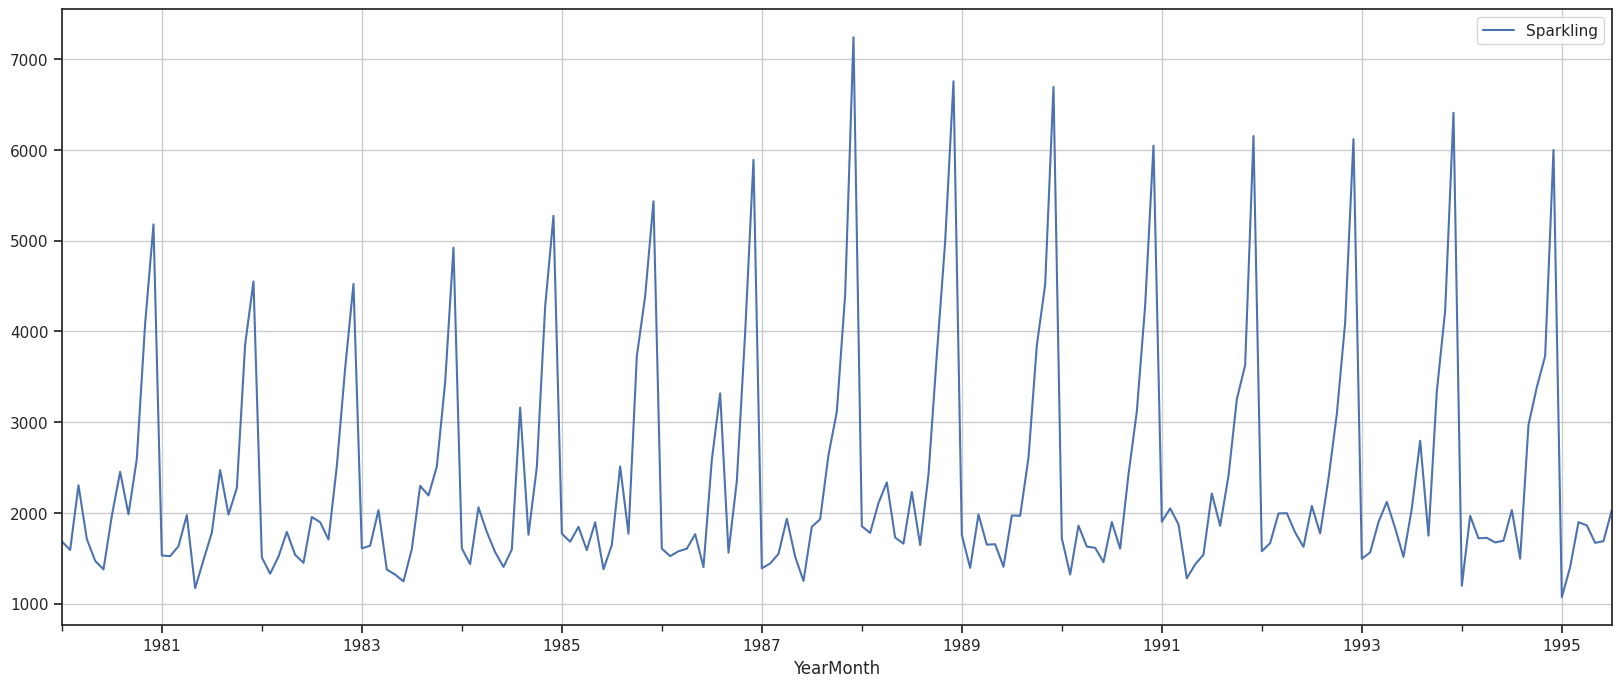

In [93]:
df.plot(figsize=(20,8))
plt.grid();

In [94]:
df['Year']=df.index.year
df['Month']=df.index.month
df.head()

,Sparkling,Year,Month
YearMonth,,,
1980-01-01,1686,1980,1
1980-02-01,1591,1980,2
1980-03-01,2304,1980,3
1980-04-01,1712,1980,4
1980-05-01,1471,1980,5


## 1.2 Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [95]:
# datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
 1   Year       187 non-null    int64
 2   Month      187 non-null    int64
dtypes: int64(3)
memory usage: 5.8 KB


In [96]:
df.describe()

,Sparkling,Year,Month
count,187.000000,187.000000,187.000000
mean,2402.417112,1987.299465,6.406417
std,1295.111540,4.514749,3.450972
min,1070.000000,1980.000000,1.000000
25%,1605.000000,1983.000000,3.000000
50%,1874.000000,1987.000000,6.000000
75%,2549.000000,1991.000000,9.000000
max,7242.000000,1995.000000,12.000000


In [97]:
df.isnull().sum()

Sparkling    0
Year         0
Month        0
dtype: int64

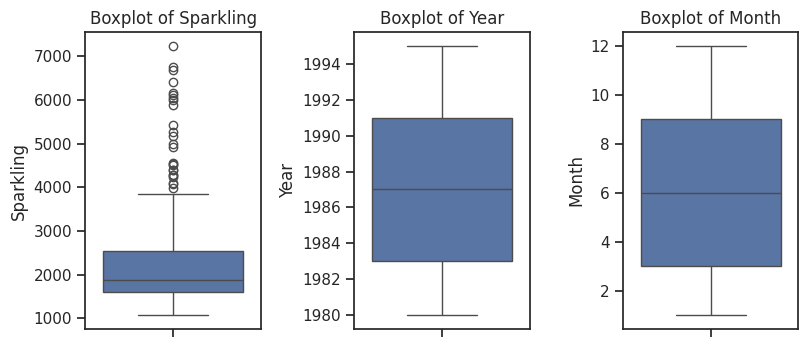

In [98]:
dfbox=df
plt.figure(figsize = (19,10))
feature_list = dfbox.columns
for i in range(len(feature_list)):
    plt.subplot(3, 7, i + 1)
    sns.boxplot(y = dfbox[feature_list[i]], data = dfbox)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

### Sparkling

<Axes: xlabel='YearMonth'>

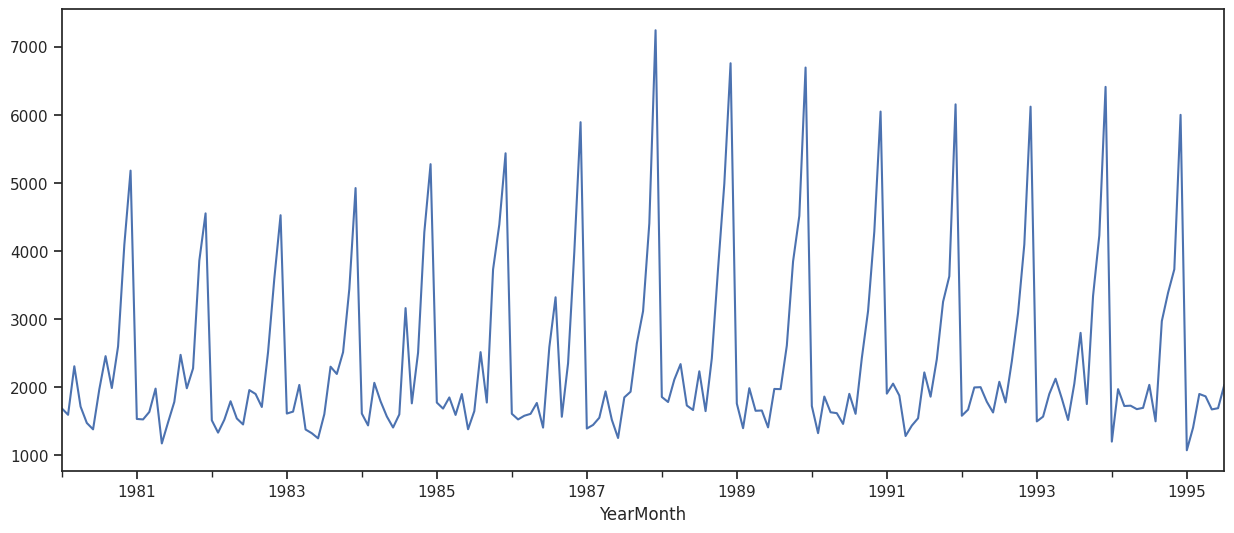

In [99]:
plt.figure(figsize=(15,6))
df['Sparkling'].plot()

### Yearly Boxplot

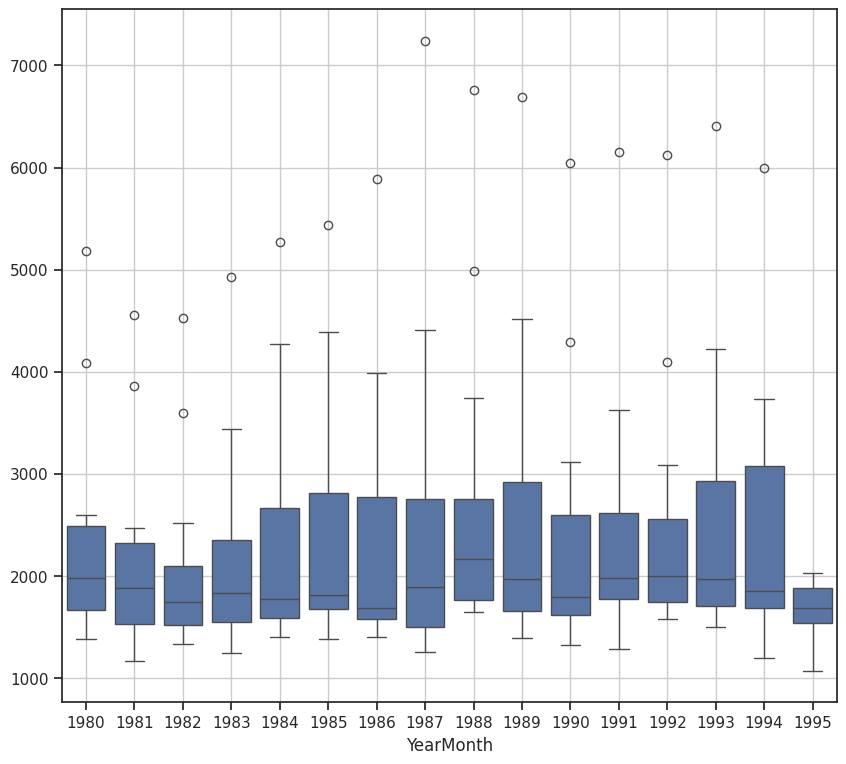

In [100]:
_, ax = plt.subplots(figsize=(10,9))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

### Monthly Boxplot

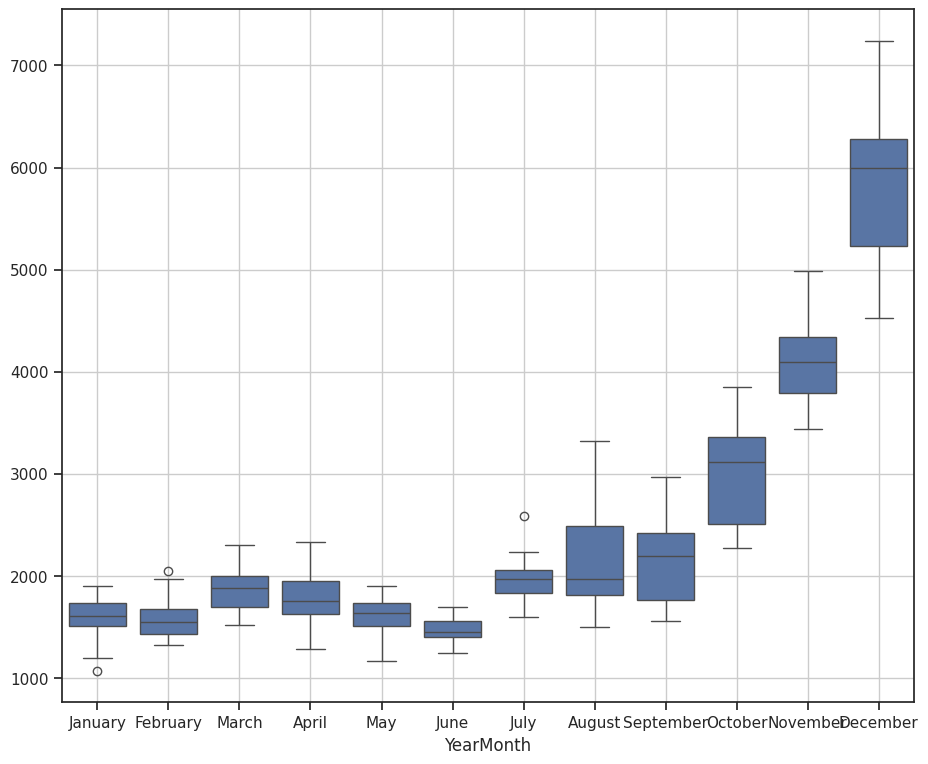

In [101]:
_, ax = plt.subplots(figsize=(11,9))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

### Week Days Boxplot

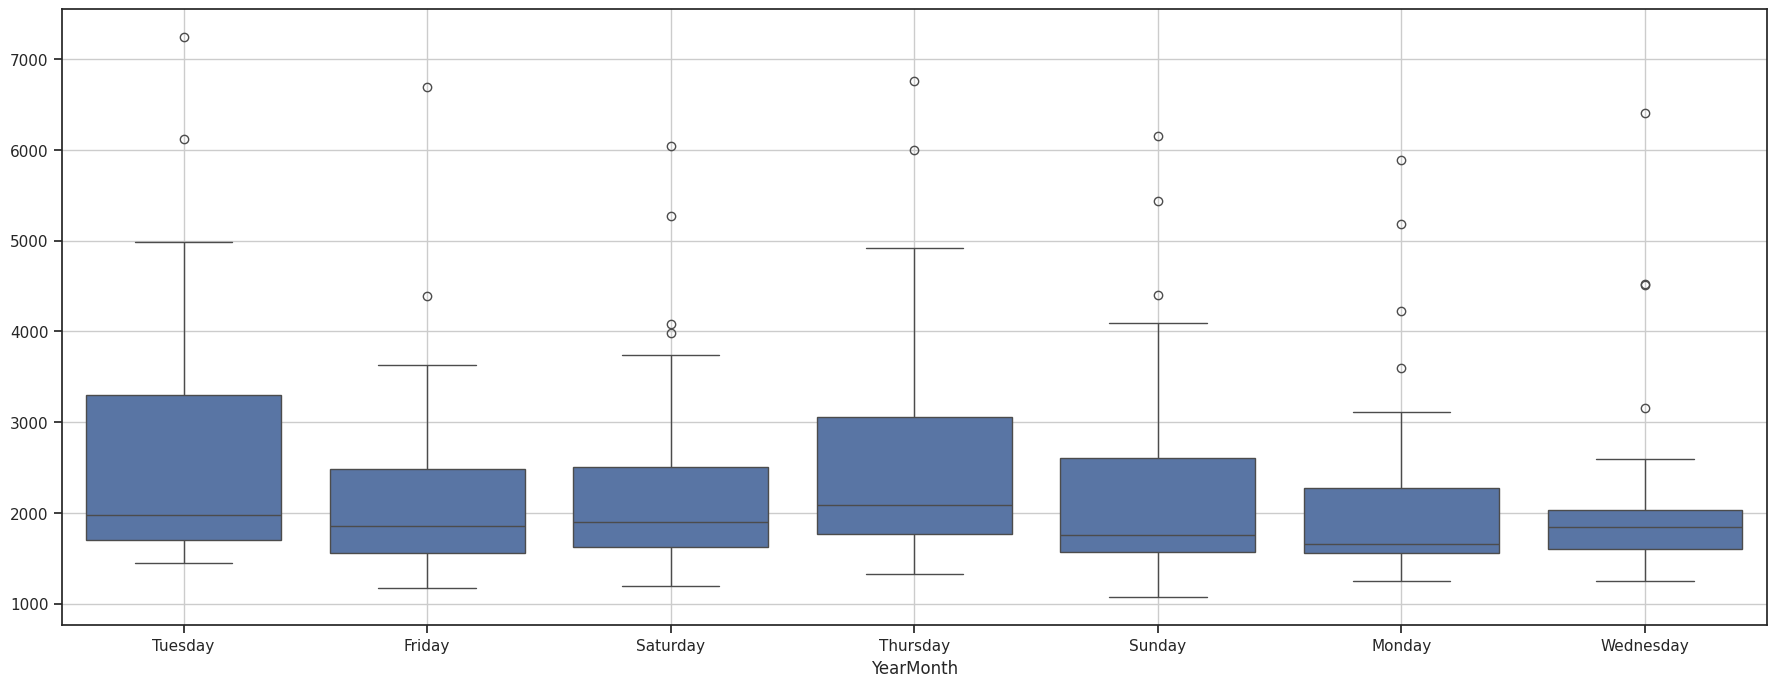

In [102]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.day_name(),y = df.values[:,0],ax=ax)
plt.grid();

### Graph of monthly Sparkling across years.

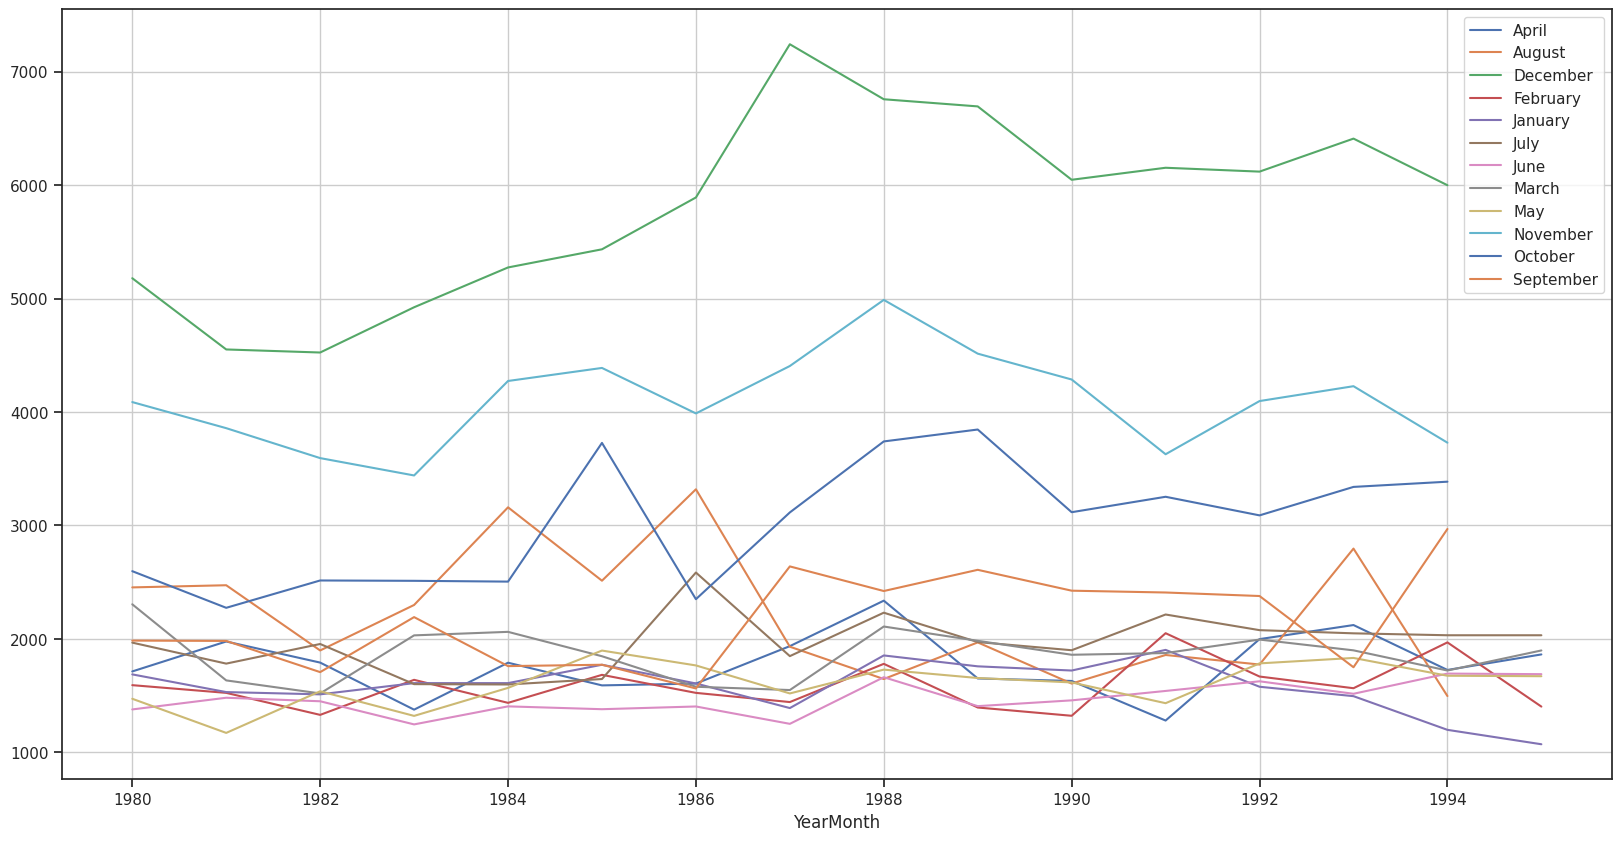

In [103]:
monthly_Sparkling_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month_name(), index = df.index.year)
monthly_Sparkling_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

### Plot ECDF: Empirical Cumulative Distribution Function

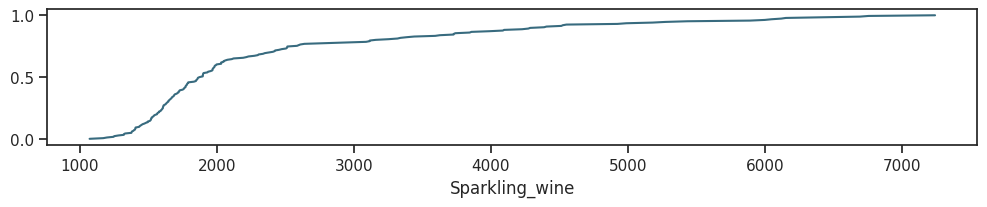

In [104]:
from statsmodels.distributions.empirical_distribution import ECDF
sns.set(style = "ticks")
c = '#386B7F'
plt.figure(figsize = (12, 6))
plt.subplot(312)
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Sparkling_wine');

### Decomposition

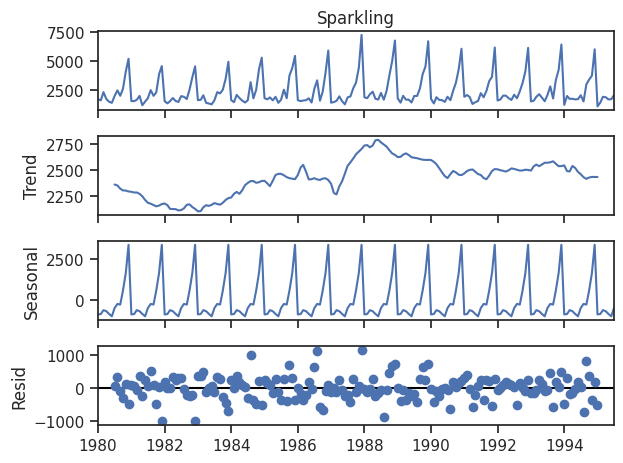

In [105]:
decomposition = seasonal_decompose(df['Sparkling'],model='additive')
decomposition.plot();

In [106]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


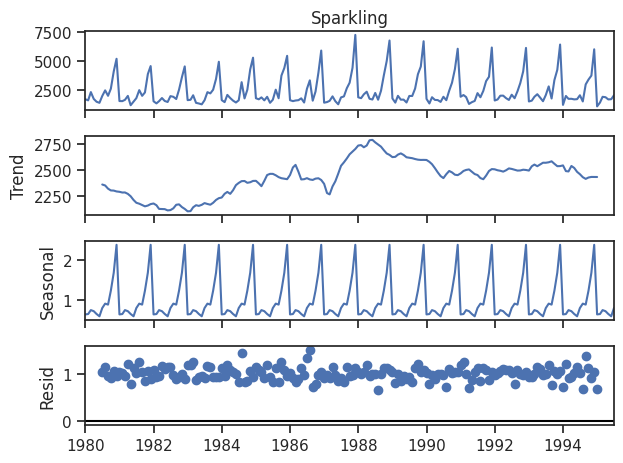

In [107]:
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();

In [108]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

## 1.3 Split the data into training and test. The test data should start in 1991.

In [109]:
train = df[df.index < '1991-01-01']
test = df[df.index >= '1991-01-01']

In [110]:
print('Shape of datasets:')
print("train dataset: ",train.shape)
print("test dataset: ",test.shape,'\n')
print('Rows of dataset: ')
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

Shape of datasets:
train dataset:  (132, 3)
test dataset:  (55, 3) 

Rows of dataset: 
First few rows of Training Data 
             Sparkling  Year  Month
YearMonth                         
1980-01-01       1686  1980      1
1980-02-01       1591  1980      2
1980-03-01       2304  1980      3
1980-04-01       1712  1980      4
1980-05-01       1471  1980      5 

Last few rows of Training Data 
             Sparkling  Year  Month
YearMonth                         
1990-08-01       1605  1990      8
1990-09-01       2424  1990      9
1990-10-01       3116  1990     10
1990-11-01       4286  1990     11
1990-12-01       6047  1990     12 

First few rows of Test Data 
             Sparkling  Year  Month
YearMonth                         
1991-01-01       1902  1991      1
1991-02-01       2049  1991      2
1991-03-01       1874  1991      3
1991-04-01       1279  1991      4
1991-05-01       1432  1991      5 

Last few rows of Test Data 
             Sparkling  Year  Month
YearMonth  

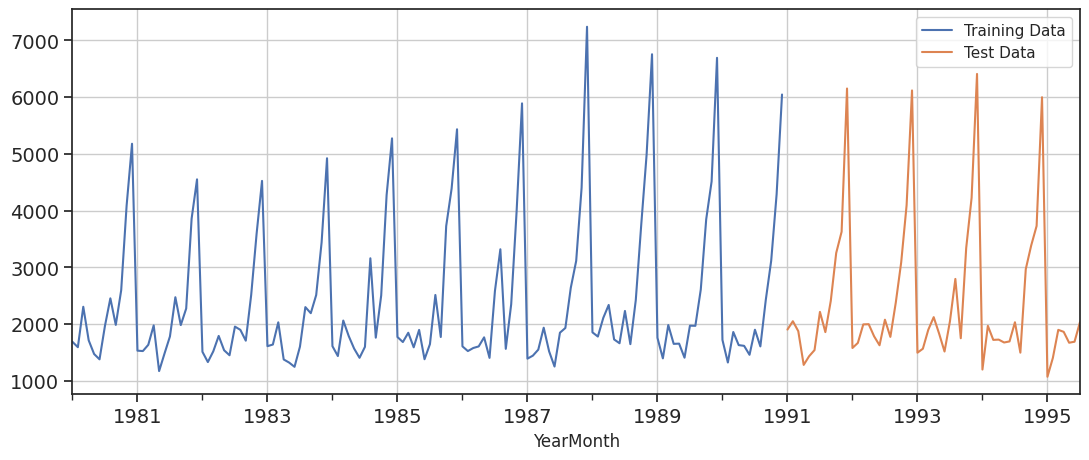

In [111]:
# Plot
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## 1.4 Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

- Model 1:Linear Regression
- Model 2: Naive Approach
- Model 3: Simple Average
- Model 4: Moving Average(MA)
- Model 5: Simple Exponential Smoothing
- Model 6: Double Exponential Smoothing (Holt's Model)
- Model 7: Triple Exponential Smoothing (Holt - Winter's Model)  

### Model 1: Linear Regression

In [112]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]

print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [113]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [114]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

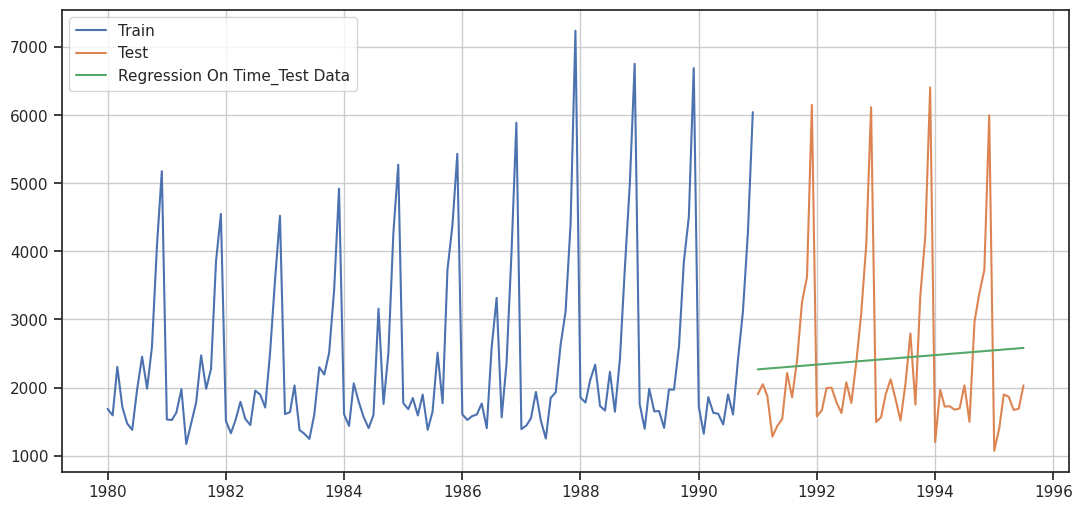

In [115]:
test_predictions_model1            = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#### Model Evaluation

In [116]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Linear Regression'])
resultsDf

,Test RMSE
Linear Regression,1275.867052


### Model 2: Naive Approach:

In [117]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [118]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

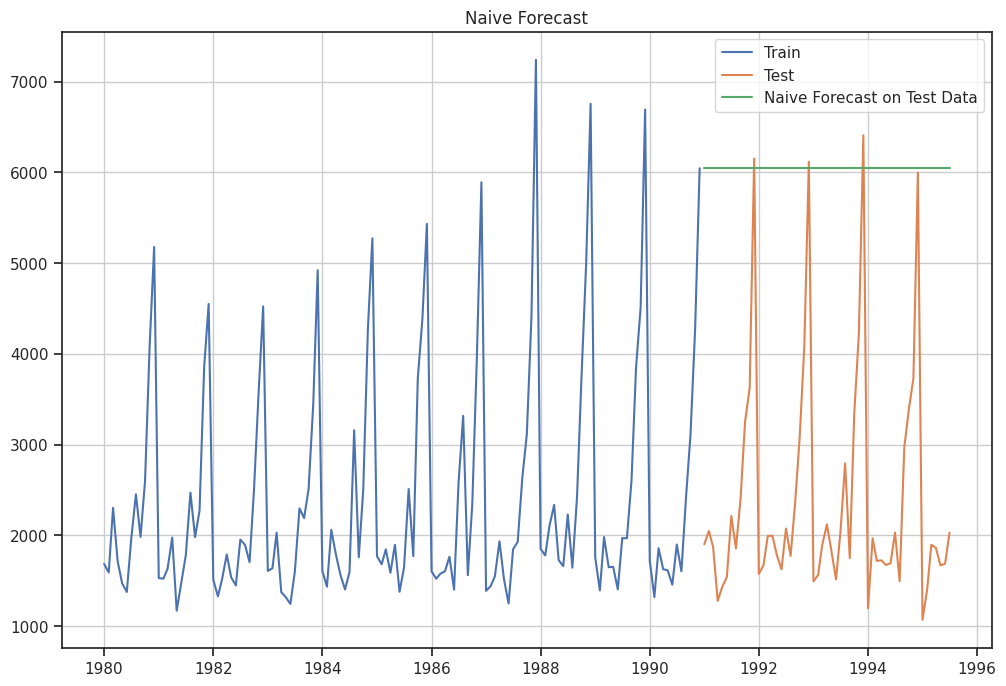

In [119]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

#### Model Evaluation

### Method 3: Simple Average

In [176]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [177]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,Year,Month,mean_forecast
YearMonth,,,,
1991-01-01,1902,1991,1,2403.780303
1991-02-01,2049,1991,2,2403.780303
1991-03-01,1874,1991,3,2403.780303
1991-04-01,1279,1991,4,2403.780303
1991-05-01,1432,1991,5,2403.780303


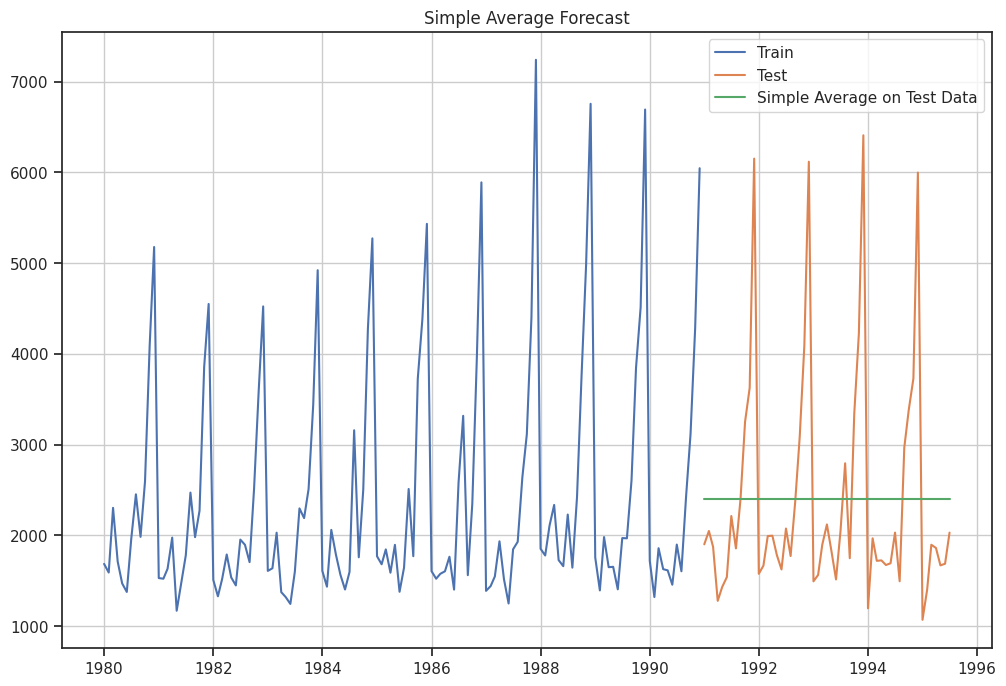

In [178]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();


#### Model Evaluation

In [179]:
## Test Data - RMSE

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
Linear Regression,1275.867052
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",1778.564670
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",1304.927405
Simple Average Model,1275.081804


### Method 4: Moving Average(MA)

In [180]:
MovingAverage = df.copy()
MovingAverage.head()

,Sparkling,Year,Month
YearMonth,,,
1980-01-01,1686,1980,1
1980-02-01,1591,1980,2
1980-03-01,2304,1980,3
1980-04-01,1712,1980,4
1980-05-01,1471,1980,5


In [181]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Year,Month,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,,,
1980-01-01,1686,1980,1,NaN,NaN,NaN,NaN
1980-02-01,1591,1980,2,1638.5,NaN,NaN,NaN
1980-03-01,2304,1980,3,1947.5,NaN,NaN,NaN
1980-04-01,1712,1980,4,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1980,5,1591.5,1769.50,NaN,NaN


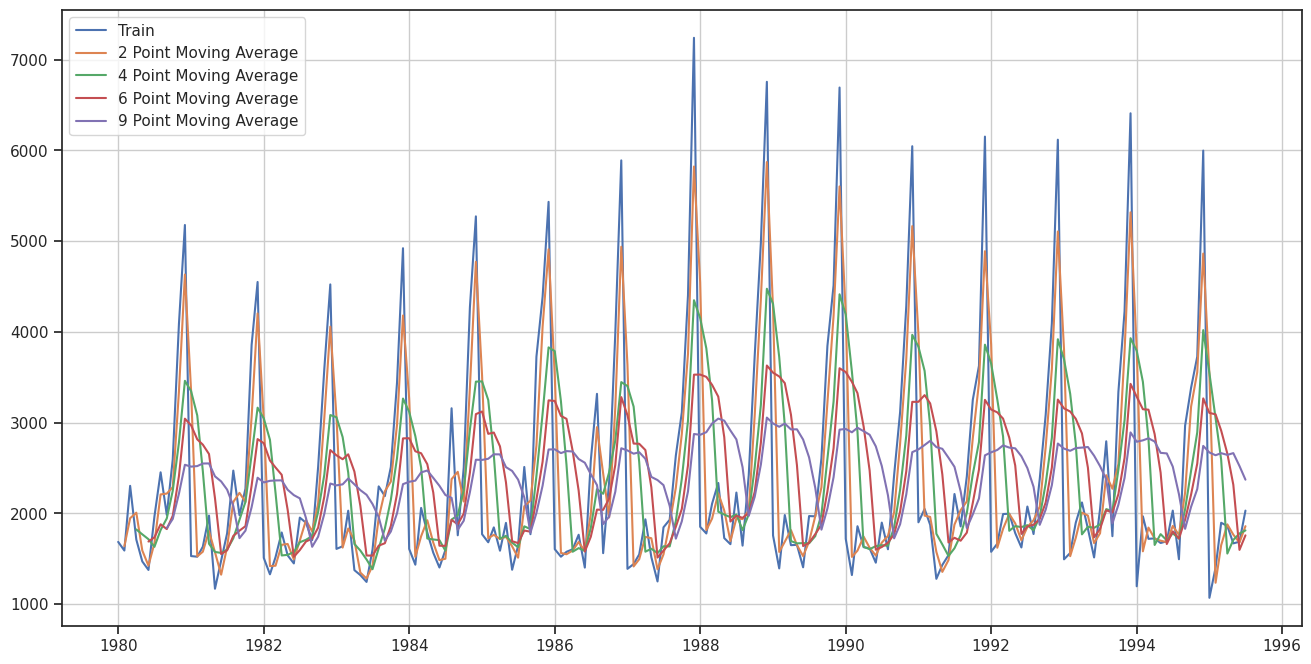

In [182]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [183]:
#Creating train and test set
trailing_MovingAverage_train=MovingAverage[MovingAverage.index < '1991-01-01']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index >= '1991-01-01']
print(trailing_MovingAverage_test.shape)
print(trailing_MovingAverage_train.shape)

(55, 7)
(132, 7)


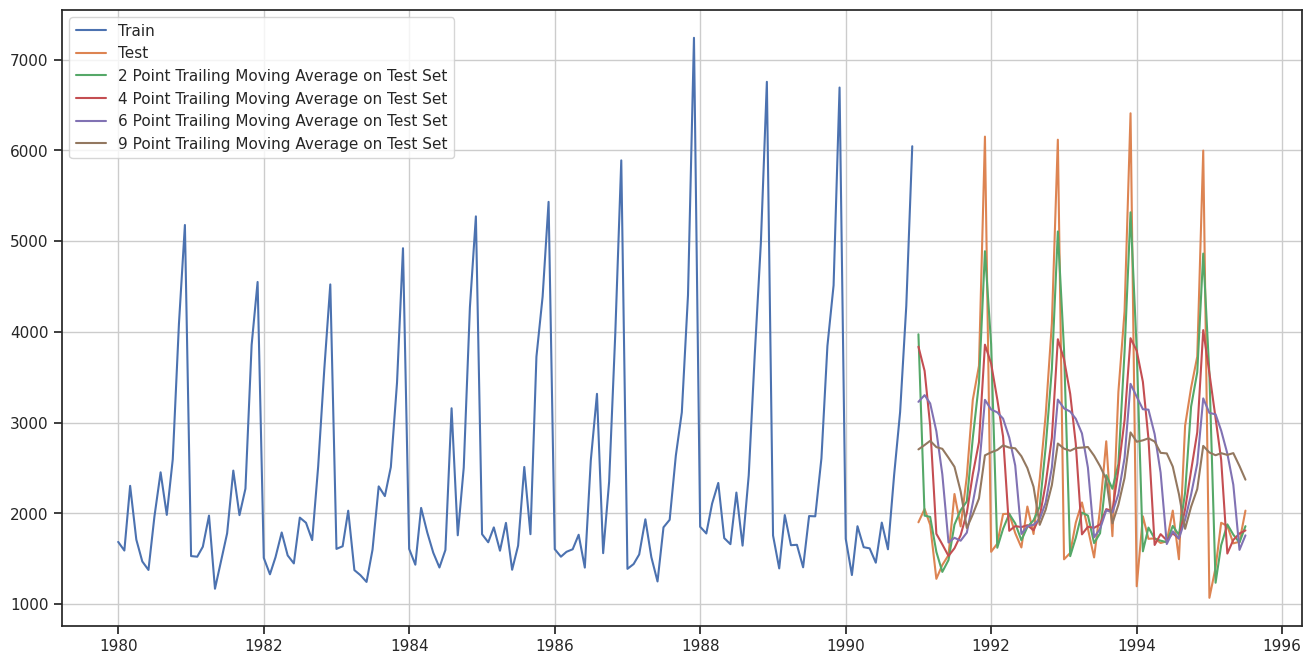

In [184]:

## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

#### Model Evaluation

In [185]:
## Test Data - RMSE --> 2 point Trailing MA
rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)

## Test Data - RMSE  --> 4 point Trailing MA
rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)

## Test Data - RMSE --> 6 point Trailing MA
rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)

## Test Data - RMSE  --> 9 point Trailing MA
rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)

In [186]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
Linear Regression,1275.867052
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",1778.564670
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",1304.927405
Simple Average Model,1275.081804


### Method 5: Simple Exponential Smoothing

In [187]:
SES_train = train.copy()
SES_test = test.copy()

In [188]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

In [189]:
model_SES_autofit = model_SES.fit(optimized=True)

In [190]:
model_SES_autofit.params

{'smoothing_level': 0.03953488372093023,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [191]:
resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

,Alpha Values,Train RMSE,Test RMSE


In [192]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Sparkling,Year,Month,predict
YearMonth,,,,
1991-01-01,1902,1991,1,2676.676366
1991-02-01,2049,1991,2,2676.676366
1991-03-01,1874,1991,3,2676.676366
1991-04-01,1279,1991,4,2676.676366
1991-05-01,1432,1991,5,2676.676366


In [193]:
resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))

    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)

    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)

    resultsDf_temp = resultsDf_temp.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

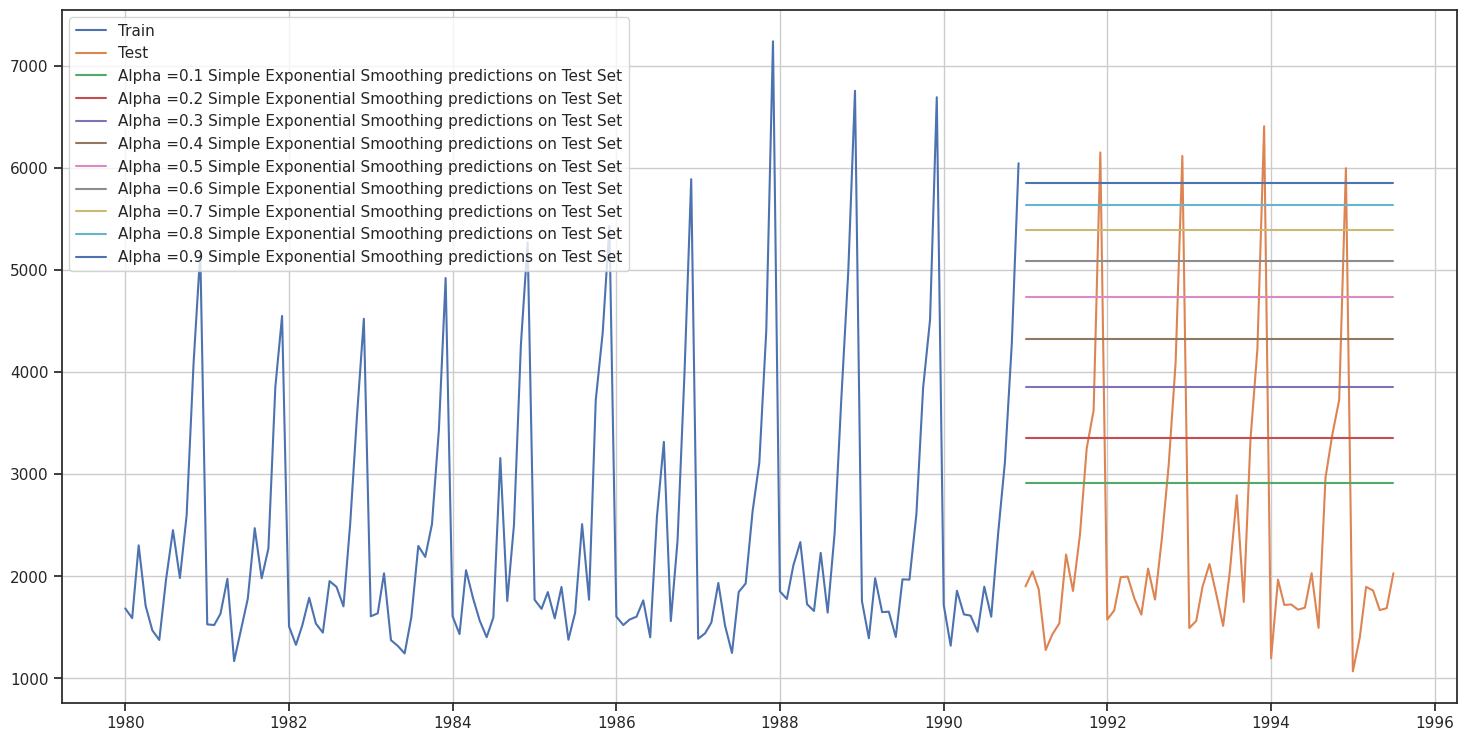

In [194]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.30000000000000004], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.5], label='Alpha =0.5 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.6], label='Alpha =0.6 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.7000000000000001], label='Alpha =0.7 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.8], label='Alpha =0.8 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.9], label='Alpha =0.9 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

#### Model Evaluation

In [195]:
resultsDf_temp.sort_values(by=['Test RMSE']).head(9)

,Alpha Values,Train RMSE,Test RMSE
0,0.1,1333.873836,1375.393398
1,0.2,1356.042987,1595.206839
2,0.3,1359.511747,1935.507132
3,0.4,1352.588879,2311.919615
4,0.5,1344.004369,2666.351413
5,0.6,1338.805381,2979.204388
6,0.7,1338.844308,3249.944092
7,0.8,1344.462091,3483.801006
8,0.9,1355.723518,3686.794285


In [196]:
resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True)

## Test Data
resultsDf_5 = pd.DataFrame({'Test RMSE': [resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
Linear Regression,1275.867052
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",1778.564670
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",1304.927405
Simple Average Model,1275.081804


### Method 6: Double Exponential Smoothing (Holt's Model)

In [197]:
DES_train = train.copy()
DES_test = test.copy()

In [198]:
model_DES = Holt(DES_train['Sparkling'])

In [199]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
model_DES_autofit = model_DES.fit(optimized=True)

model_DES_autofit.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [200]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

,Sparkling,Year,Month,predict
YearMonth,,,,
1991-01-01,1902,1991,1,5221.278699
1991-02-01,2049,1991,2,5127.886554
1991-03-01,1874,1991,3,5034.494409
1991-04-01,1279,1991,4,4941.102264
1991-05-01,1432,1991,5,4847.710119


In [201]:
del resultsDf_temp
## First we will define an empty dataframe to store our values from the loop

resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

,Alpha Values,Train RMSE,Test RMSE


In [202]:
## Test Data

rmse_model_temp = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model_temp))

For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 1304.927


In [203]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))

        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)

        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)

        resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)
resultsDf_6

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,1382.520870,1778.564670
1,0.1,0.2,1413.598835,2599.439986
2,0.1,0.3,1445.762015,4293.084674
3,0.1,0.4,1480.897776,6039.537339
4,0.1,0.5,1521.108657,7390.522201
...,...,...,...,...
95,1.0,0.6,1753.402326,49327.087977
96,1.0,0.7,1825.187155,52655.765663
97,1.0,0.8,1902.013709,55442.273880
98,1.0,0.9,1985.368445,57823.177011


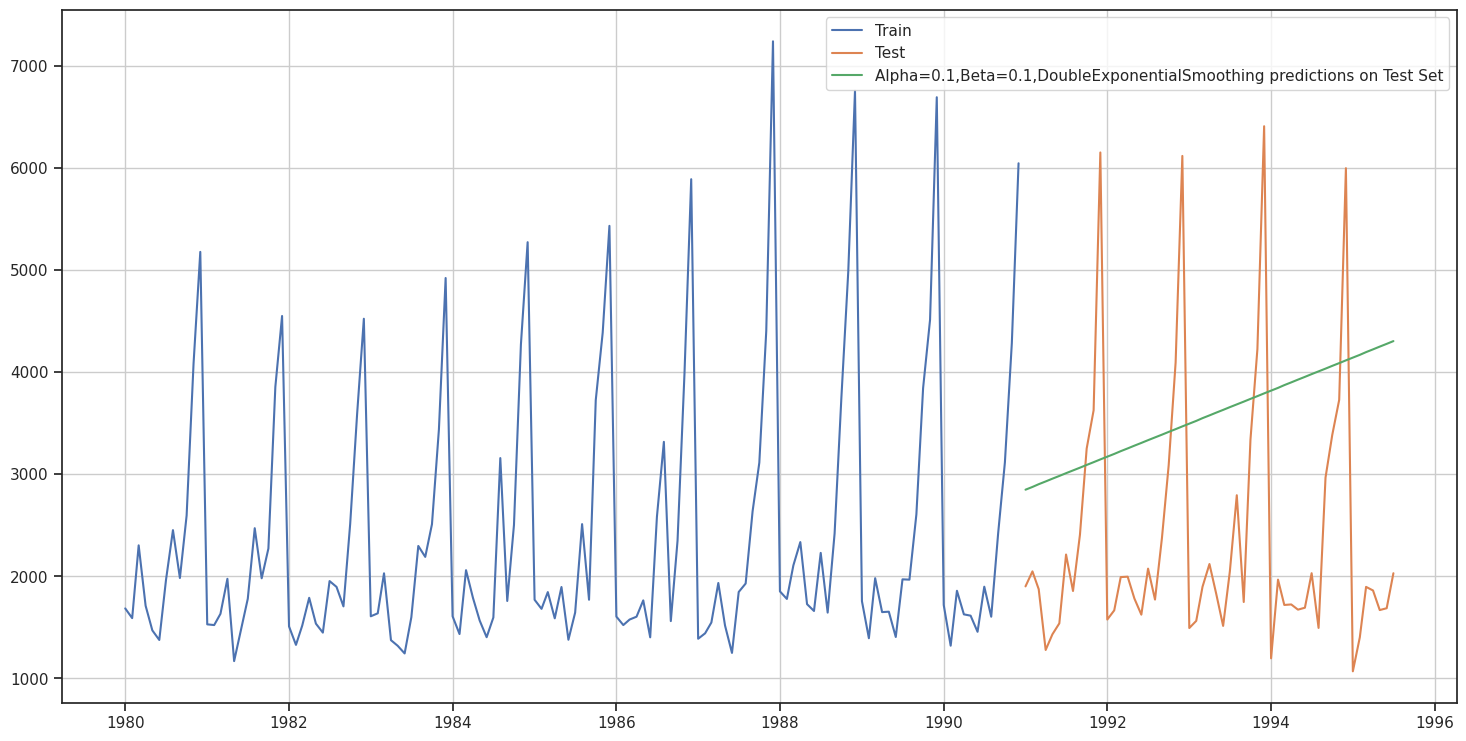

In [204]:

## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

#### Model Evaluation

In [205]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,1382.520870,1778.564670
1,0.1,0.2,1413.598835,2599.439986
10,0.2,0.1,1418.041591,3611.763322
2,0.1,0.3,1445.762015,4293.084674
20,0.3,0.1,1431.169601,5908.185554


In [206]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE
Linear Regression,1275.867052
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",1778.564670
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",1304.927405
Simple Average Model,1275.081804


### Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [207]:
TES_train = train.copy()
TES_test = test.copy()

In [208]:
model_TES_ta_sa = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='additive')
model_TES_ta_sm = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative')
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sparkling'],trend='multiplicative',seasonal='multiplicative')
model_TES_tm_sa = ExponentialSmoothing(TES_train['Sparkling'],trend='multiplicative',seasonal='additive')

In [161]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [162]:
model_TES_autofit_ta_sa = model_TES_ta_sa.fit(optimized=True)
model_TES_autofit_ta_sm = model_TES_ta_sm.fit(optimized=True)
model_TES_autofit_tm_sm = model_TES_tm_sm.fit(optimized=True)
model_TES_autofit_tm_sa = model_TES_tm_sa.fit(optimized=True)

In [163]:

## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [164]:
model_TES_autofit_ta_sa.params

{'smoothing_level': 0.11127217859992398,
 'smoothing_trend': 0.01236078328796452,
 'smoothing_seasonal': 0.4607177642170641,
 'damping_trend': nan,
 'initial_level': 2356.578308185137,
 'initial_trend': -0.01853556812789492,
 'initial_seasons': array([-636.23360535, -722.98363367, -398.6436108 , -473.43084469,
        -808.42525514, -815.35024951, -384.23066987,   72.99508063,
        -237.44272911,  272.32584554, 1541.3782103 , 2590.0775386 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [165]:
model_TES_autofit_ta_sm.params

{'smoothing_level': 0.11119949831569428,
 'smoothing_trend': 0.049430920023313805,
 'smoothing_seasonal': 0.3620525701498937,
 'damping_trend': nan,
 'initial_level': 2356.5264391986907,
 'initial_trend': -9.443690175376352,
 'initial_seasons': array([0.71325627, 0.68332509, 0.90537798, 0.80561841, 0.65639659,
        0.65451508, 0.88690241, 1.13423953, 0.91927727, 1.21396745,
        1.86941738, 2.3734461 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [166]:
model_TES_autofit_tm_sm.params

{'smoothing_level': 0.11107188540711412,
 'smoothing_trend': 0.049365309949742364,
 'smoothing_seasonal': 0.3621557605717753,
 'damping_trend': nan,
 'initial_level': 2356.541814724122,
 'initial_trend': 0.9987259871980313,
 'initial_seasons': array([0.73133608, 0.69868555, 0.90031567, 0.81016953, 0.66861198,
        0.66938193, 0.87905698, 1.11657177, 0.91556679, 1.18173667,
        1.84612803, 2.34747359]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [167]:
model_TES_autofit_tm_sa.params

{'smoothing_level': 0.11525926167295093,
 'smoothing_trend': 0.013289249637018248,
 'smoothing_seasonal': 0.4565935865353621,
 'damping_trend': nan,
 'initial_level': 2357.2388893517714,
 'initial_trend': 0.9994606442736722,
 'initial_seasons': array([-636.77003546, -723.38956008, -397.61934462, -473.71510371,
        -808.95039309, -815.85988383, -384.23255231,   73.66806555,
        -238.14788586,  272.17070913, 1542.70950197, 2591.09596332]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [168]:
TES_test['predict_ta_sa'] = model_TES_autofit_ta_sa.forecast(steps=len(test))
TES_test.head()

,Sparkling,Year,Month,predict_ta_sa
YearMonth,,,,
1991-01-01,1902,1991,1,1490.574426
1991-02-01,2049,1991,2,1204.714325
1991-03-01,1874,1991,3,1688.941106
1991-04-01,1279,1991,4,1551.450810
1991-05-01,1432,1991,5,1461.440427


In [169]:
TES_test['predict_ta_sm'] = model_TES_autofit_ta_sm.forecast(steps=len(test))
TES_test.head()

,Sparkling,Year,Month,predict_ta_sa,predict_ta_sm
YearMonth,,,,,
1991-01-01,1902,1991,1,1490.574426,1587.685845
1991-02-01,2049,1991,2,1204.714325,1356.590237
1991-03-01,1874,1991,3,1688.941106,1763.121866
1991-04-01,1279,1991,4,1551.450810,1656.379813
1991-05-01,1432,1991,5,1461.440427,1542.186697


In [170]:
TES_test['predict_tm_sm'] = model_TES_autofit_tm_sm.forecast(steps=len(test))
TES_test.head()

,Sparkling,Year,Month,predict_ta_sa,predict_ta_sm,predict_tm_sm
YearMonth,,,,,,
1991-01-01,1902,1991,1,1490.574426,1587.685845,1591.454098
1991-02-01,2049,1991,2,1204.714325,1356.590237,1360.482080
1991-03-01,1874,1991,3,1688.941106,1763.121866,1767.997947
1991-04-01,1279,1991,4,1551.450810,1656.379813,1661.667528
1991-05-01,1432,1991,5,1461.440427,1542.186697,1547.440667


In [171]:
TES_test['predict_tm_sa'] = model_TES_autofit_tm_sa.forecast(steps=len(test))
TES_test.head()

,Sparkling,Year,Month,predict_ta_sa,predict_ta_sm,predict_tm_sm,predict_tm_sa
YearMonth,,,,,,,
1991-01-01,1902,1991,1,1490.574426,1587.685845,1591.454098,1484.431732
1991-02-01,2049,1991,2,1204.714325,1356.590237,1360.482080,1200.192764
1991-03-01,1874,1991,3,1688.941106,1763.121866,1767.997947,1683.864662
1991-04-01,1279,1991,4,1551.450810,1656.379813,1661.667528,1547.844914
1991-05-01,1432,1991,5,1461.440427,1542.186697,1547.440667,1457.652829


In [172]:
rmse_model_temp_ta_sa = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict_ta_sa'],squared=False)
print("For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f"
      %(rmse_model_temp_ta_sa))
rmse_model_temp_ta_sm = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict_ta_sm'],squared=False)
print("For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f"
      %(rmse_model_temp_ta_sm))
rmse_model_temp_tm_sm = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict_tm_sm'],squared=False)
print("For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f"
      %(rmse_model_temp_tm_sm))
rmse_model_temp_tm_sa = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict_tm_sa'],squared=False)
print("For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f"
      %(rmse_model_temp_tm_sa))

For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is 378.626
For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 403.706
For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 380.393
For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is 379.646


In [173]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse_model_temp}
                           ,index=['Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
Linear Regression,1275.867052
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",1778.564670
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",1304.927405


In [174]:
TES_train = train.copy()
TES_test = test.copy()
del resultsDf_7_2

## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': [],
                             'Method' : []})
resultsDf_7_2



,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Method


In [175]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))

            rmse_model7_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict_ta_sa',i,j,k],squared=False)

            rmse_model7_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict_ta_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)

            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'ta_sa'}
                                                 , ignore_index=True)


In [209]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))

            rmse_model7_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict_ta_sm',i,j,k],squared=False)

            rmse_model7_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict_ta_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)

            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'ta_sm'}
                                                 , ignore_index=True)


In [210]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))

            rmse_model7_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict_tm_sm',i,j,k],squared=False)

            rmse_model7_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict_tm_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)

            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'tm_sm'}
                                                 , ignore_index=True)


In [211]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))

            rmse_model7_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict_tm_sa',i,j,k],squared=False)

            rmse_model7_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict_tm_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)

            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'tm_sa'}
                                                 , ignore_index=True)

In [212]:
TES_test.head()

,Sparkling,Year,Month,"(predict_ta_sm, 0.1, 0.1, 0.1)","(predict_ta_sm, 0.1, 0.1, 0.2)","(predict_ta_sm, 0.1, 0.1, 0.30000000000000004)","(predict_ta_sm, 0.1, 0.1, 0.4)","(predict_ta_sm, 0.1, 0.1, 0.5)","(predict_ta_sm, 0.1, 0.1, 0.6)","(predict_ta_sm, 0.1, 0.1, 0.7000000000000001)",...,"(predict_tm_sa, 0.9, 0.8, 0.9)","(predict_tm_sa, 0.9, 0.9, 0.1)","(predict_tm_sa, 0.9, 0.9, 0.2)","(predict_tm_sa, 0.9, 0.9, 0.30000000000000004)","(predict_tm_sa, 0.9, 0.9, 0.4)","(predict_tm_sa, 0.9, 0.9, 0.5)","(predict_tm_sa, 0.9, 0.9, 0.6)","(predict_tm_sa, 0.9, 0.9, 0.7000000000000001)","(predict_tm_sa, 0.9, 0.9, 0.8)","(predict_tm_sa, 0.9, 0.9, 0.9)"
YearMonth,,,,,,,,,,,,,,,,,,,,,
1991-01-01,1902,1991,1,1632.957942,1587.296969,1565.992488,1560.277156,1563.359101,1569.825578,1575.786827,...,-5.868610e+20,1681.548575,1003.861817,1011.116778,-268.622873,-1267.416405,140057.792035,2.837339e+09,8.271367e+14,-5.212074e+23
1991-02-01,2049,1991,2,1501.502654,1417.927234,1357.798934,1314.434152,1282.833760,1259.160607,1240.612034,...,-1.101754e+23,2493.688129,1469.309964,1145.238568,-2129.658709,-11966.222163,153448.955624,3.813138e+10,2.759949e+17,-2.662675e+26
1991-03-01,1874,1991,3,1841.151329,1766.615895,1729.423804,1716.367038,1716.163604,1720.156139,1722.196966,...,-4.674701e+24,3209.508652,2499.957287,2962.569457,592.617998,-14594.985341,132162.891870,5.093329e+11,9.097558e+19,-8.209961e+27
1991-04-01,1279,1991,4,1753.079160,1681.098681,1633.570736,1598.594481,1570.408141,1546.489649,1525.856078,...,-5.266723e+25,3046.434803,2171.122226,3050.550334,1923.737151,-785.194212,196998.771995,6.803179e+12,2.998699e+22,1.059273e+31
1991-05-01,1432,1991,5,1524.524131,1516.880183,1502.058048,1489.990868,1484.380791,1484.312798,1486.304404,...,-1.636152e+26,2755.658417,1623.114204,2612.626803,1438.598738,472.443999,236196.434585,9.087032e+13,9.884186e+24,5.889733e+33


#### Model Evaluation

In [213]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Method
1301,0.4,0.1,0.2,384.467709,317.434302,ta_sm
2245,0.4,0.1,0.3,381.106645,326.579641,tm_sm
1211,0.3,0.2,0.2,388.544148,329.037543,ta_sm
1200,0.3,0.1,0.1,388.220071,337.080969,ta_sm
1110,0.2,0.2,0.1,398.482510,340.186457,ta_sm


In [214]:
resultsDf_7_3 = pd.DataFrame({'Test RMSE': [resultsDf_7_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_3])
resultsDf


,Test RMSE
Linear Regression,1275.867052
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",1778.564670
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",1304.927405
Simple Average Model,1275.081804


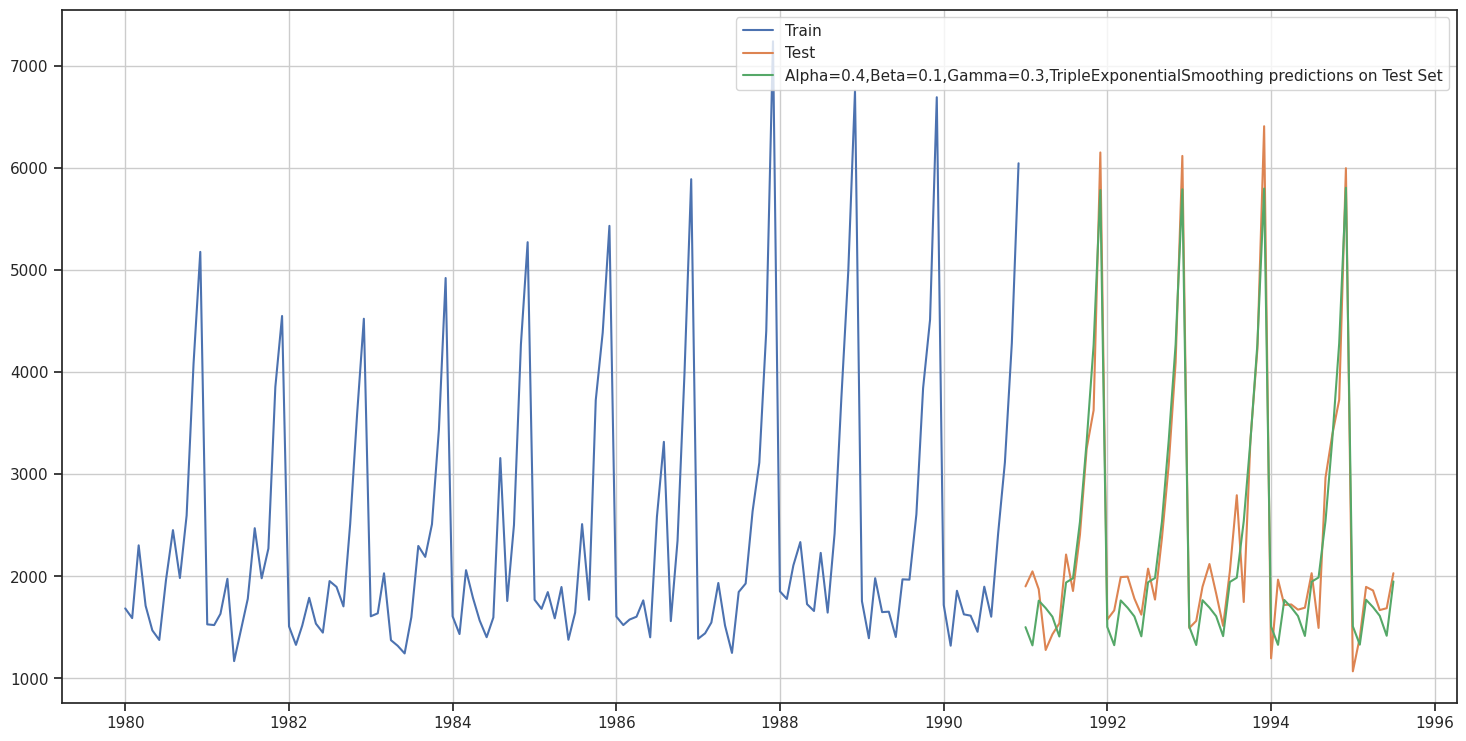

In [215]:
#  Best figures obtained for Trend = Multiplicative and Seasonality = Multiplicative
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict_tm_sm', 0.4, 0.1, 0.30000000000000004],
         label='Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

## 1.5 Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

### Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

- H0
 : The Time Series has a unit root and is thus non-stationary.
- H1
 : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the α
 value.

We see that at 5% significant level the Time Series is non-stationary.

In [216]:
from statsmodels.tsa.stattools import adfuller

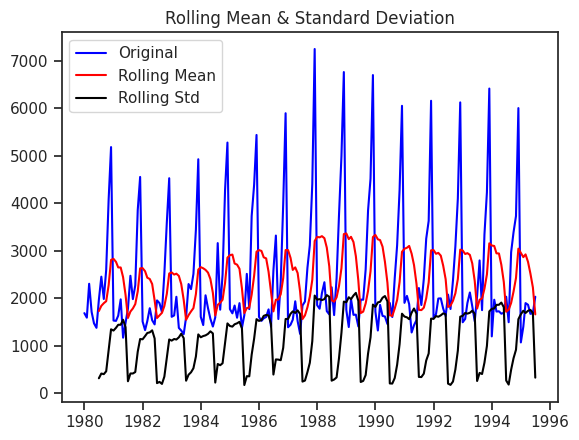

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [217]:
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
test_stationarity(df['Sparkling'])

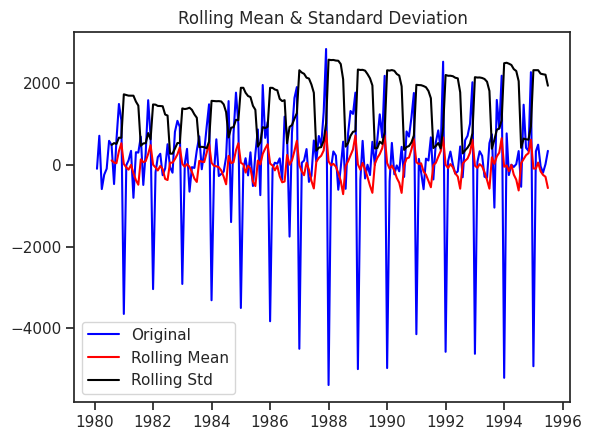

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [218]:
test_stationarity(df['Sparkling'].diff().dropna())

## 1.6 Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

### Auto - Arima Model  

In [219]:
import itertools
p = q = range(0, 4)
d= range(1,2) #since series is stationary at d=1
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [220]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [221]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.0600155919765
ARIMA(0, 1, 2) - AIC:2234.4083231352784
ARIMA(0, 1, 3) - AIC:2233.994857751357
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.755094674255
ARIMA(1, 1, 2) - AIC:2234.5272004518056
ARIMA(1, 1, 3) - AIC:2235.607815816486
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.777626238336
ARIMA(2, 1, 2) - AIC:2213.5092125741553
ARIMA(2, 1, 3) - AIC:2232.8129550828717
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.5004238522542
ARIMA(3, 1, 2) - AIC:2230.789978305661
ARIMA(3, 1, 3) - AIC:2221.4573978076833


In [222]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
10,"(2, 1, 2)",2213.509213
15,"(3, 1, 3)",2221.457398
14,"(3, 1, 2)",2230.789978
11,"(2, 1, 3)",2232.812955
9,"(2, 1, 1)",2233.777626
3,"(0, 1, 3)",2233.994858
2,"(0, 1, 2)",2234.408323
6,"(1, 1, 2)",2234.527200
13,"(3, 1, 1)",2235.500424
7,"(1, 1, 3)",2235.607816


In [223]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 25 Feb 2024   AIC                           2213.509
Time:                        18:15:50   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.215      0.0

### Predict on the Test Set using this model and evaluate the model.

In [224]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

rmse = mean_squared_error(test['Sparkling'], predicted_auto_ARIMA.tolist(), squared=False)
print(rmse)

1299.9797494286825


In [225]:
results = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Auto_ARIMA'])

resultsDf = pd.concat([resultsDf, results])
resultsDf

,Test RMSE
Linear Regression,1275.867052
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",1778.564670
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",1304.927405
Simple Average Model,1275.081804


#### Model 11 : Manual ARIMA

In [226]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

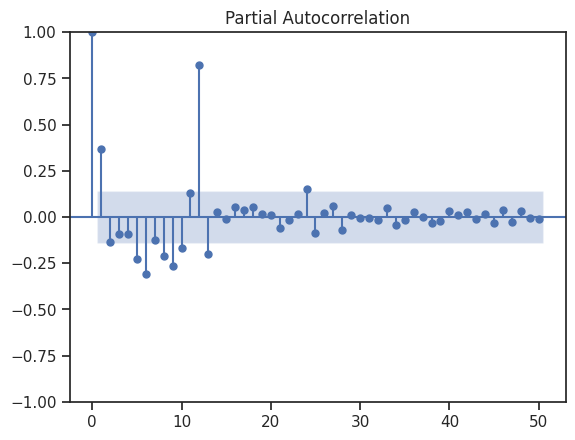

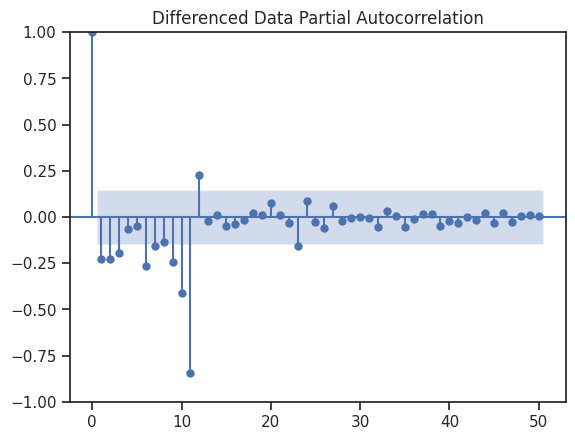

In [227]:
plot_pacf(df['Sparkling'],lags=50)
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

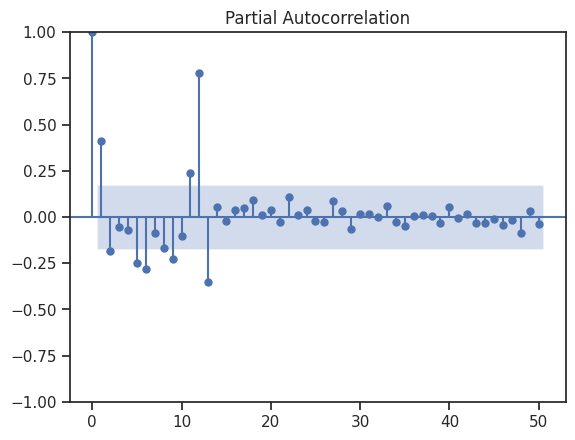

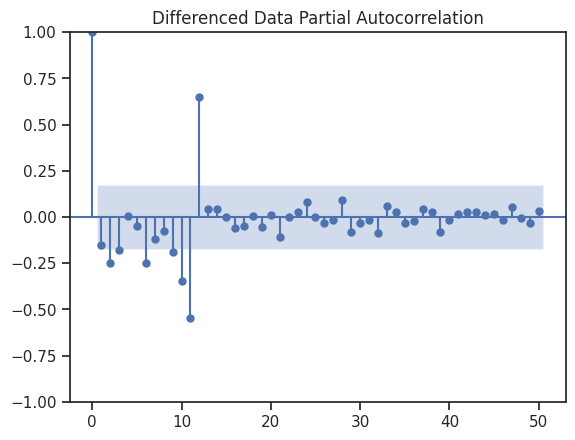

In [228]:
plot_pacf(train['Sparkling'],lags=50)
plot_pacf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [229]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(1,1,1))
results_manual_ARIMA = manual_ARIMA.fit()
print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1114.878
Date:                Sun, 25 Feb 2024   AIC                           2235.755
Time:                        18:15:52   BIC                           2244.381
Sample:                    01-01-1980   HQIC                          2239.260
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4494      0.043     10.366      0.000       0.364       0.534
ma.L1         -0.9996      0.102     -9.811      0.000      -1.199      -0.800
sigma2      1.401e+06   7.57e-08   1.85e+13      0.0

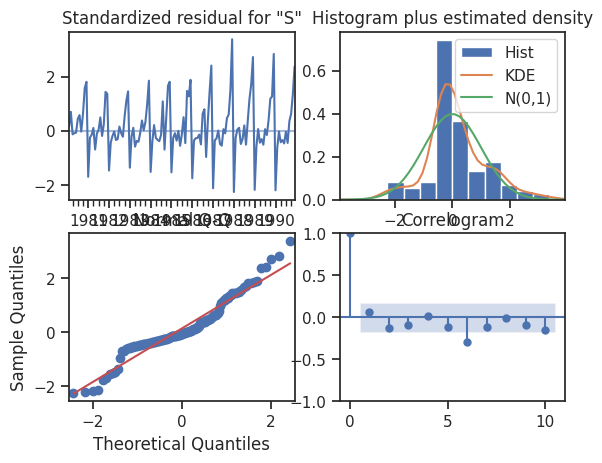

In [230]:
results_manual_ARIMA.plot_diagnostics();

### Model evaluation

In [231]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
print('RMSE:',rmse)

RMSE: 1319.9367341873026


In [232]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(3,1,3)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
Linear Regression,1275.867052
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",1778.564670
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",1304.927405
Simple Average Model,1275.081804


#### Model 12 : Manual SARIMA

In [240]:

SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC


,param,seasonal,AIC


In [241]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforc1e_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=50)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -882.088
Date:                            Sun, 25 Feb 2024   AIC                           1774.175
Time:                                    18:38:12   BIC                           1788.071
Sample:                                         0   HQIC                          1779.818
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1957      0.104      1.878      0.060      -0.009       0.400
ma.L1         -0.9404      0.053   

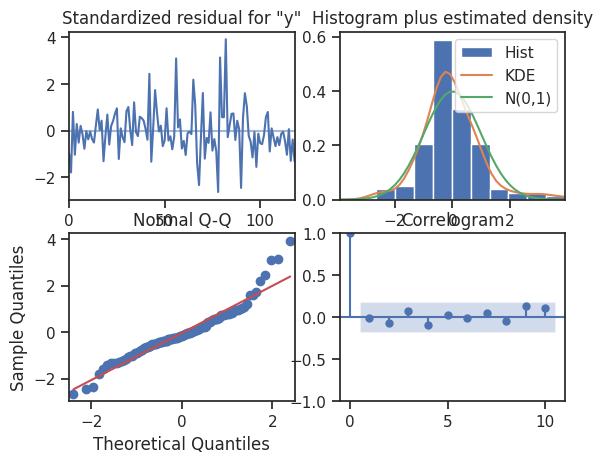

In [244]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [245]:
predicted_manual_SARIMA_6 = results_manual_SARIMA.get_forecast(steps=len(test))
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1543.900066,388.532073,782.391196,2305.408935
1,1311.208243,400.994085,525.274280,2097.142207
2,1810.538050,403.246216,1020.189990,2600.886110
3,1650.451750,404.472621,857.699979,2443.203520
4,1561.609699,405.532761,766.780094,2356.439305


In [246]:
rmse_manual_sarima = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse_manual_sarima)

359.61245426166005


In [247]:
resultsDf_10_1 = pd.DataFrame({'Test RMSE': rmse_manual_sarima}
                           ,index=['(1,1,1)(1,1,1,12),Manual_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_10_1])
resultsDf

,Test RMSE
Linear Regression,1275.867052
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",1778.564670
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",1304.927405
Simple Average Model,1275.081804


** *italicized text*bold text**## 1.8 Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [248]:
resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE
"Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing",317.434302
"(1,1,1)(1,1,1,12),Manual_SARIMA",359.612454
2pointTrailingMovingAverage,813.400684
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
4pointTrailingMovingAverage,1156.589694
Simple Average Model,1275.081804
Simple Average Model,1275.081804
Linear Regression,1275.867052
6pointTrailingMovingAverage,1283.927428


## 1.9 Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [249]:
date = pd.date_range(start='8/1/1995', end='7/1/1996', freq='MS')
date

DatetimeIndex(['1995-08-01', '1995-09-01', '1995-10-01', '1995-11-01',
               '1995-12-01', '1996-01-01', '1996-02-01', '1996-03-01',
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [250]:
future_predictions=pd.DataFrame(columns=['Sparkling_Predictions'],index=date)

In [251]:
# Prediction

In [252]:
TES_train = df.copy()

In [253]:
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sparkling'],trend='multiplicative',seasonal='multiplicative')
alpha=0.4
beta=0.1
gamma=0.3
model_TES = model_TES_tm_sm.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma,
                                optimized=False,use_brute=True)
prediction=model_TES.forecast(steps=12)

In [254]:
future_predictions['Sparkling_Predictions']=prediction
future_predictions

,Sparkling_Predictions
1995-08-01,1988.782193
1995-09-01,2652.762887
1995-10-01,3483.872246
1995-11-01,4354.989747
1995-12-01,6900.103171
1996-01-01,1546.800546
1996-02-01,1981.361768
1996-03-01,2245.459724
1996-04-01,2151.066942
1996-05-01,1929.355815


In [255]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(model_TES.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(model_TES.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,1213.490105,1988.782193,2764.074282
1995-09-01,1877.470798,2652.762887,3428.054975
1995-10-01,2708.580157,3483.872246,4259.164335
1995-11-01,3579.697659,4354.989747,5130.281836
1995-12-01,6124.811083,6900.103171,7675.395260


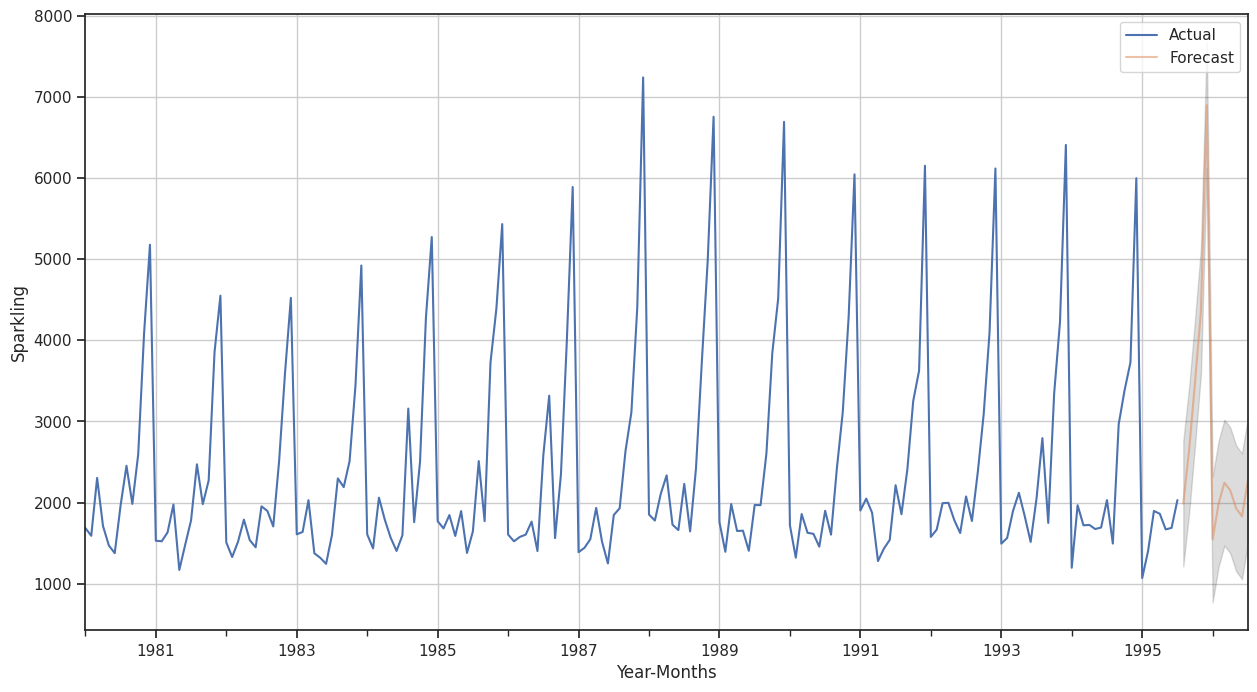

In [256]:
axis = df['Sparkling'].plot(label='Actual', figsize=(15,8))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid()
plt.show()